# Generating bivariate normal distribution

Let $(X_1,Y_1)\sim N\left(
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix},
\begin{bmatrix}
1 & \rho^2 \\
\rho^2 & 1
\end{bmatrix}
\right)$

We have to generate (X,Y).


In [16]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

# constant variables
SAMPLE_SIZE = 100000
RHO = 0.5
Mean = np.array([0, 0])
Covariancs_Matrix = np.array([[1, RHO], [RHO, 1]])

### Using numpy


Text(0, 0.5, '$X_2$')

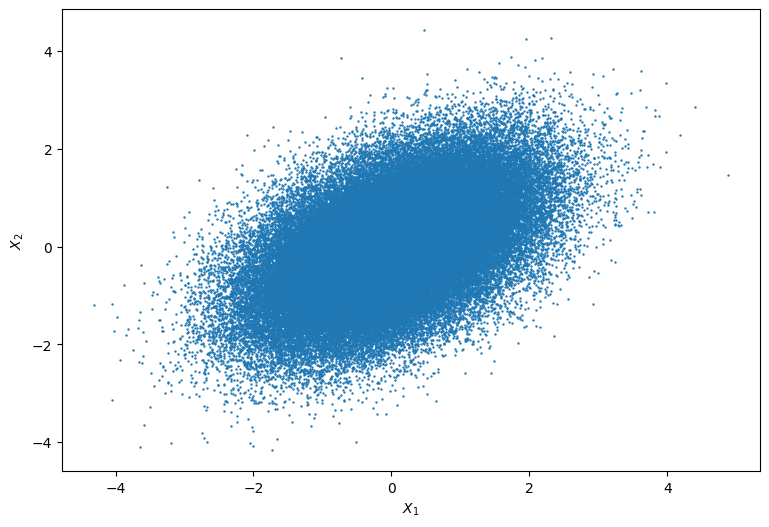

In [17]:
normal_sample = np.random.multivariate_normal(Mean, Covariancs_Matrix, SAMPLE_SIZE)
plt.figure(figsize=(9, 6))
# sns.scatterplot(x=normal_sample[:, 0], y=normal_sample[:, 1], s=2)
plt.scatter(x=normal_sample[:, 0], y=normal_sample[:, 1], s=0.5)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

## Plot standred bivariant normal


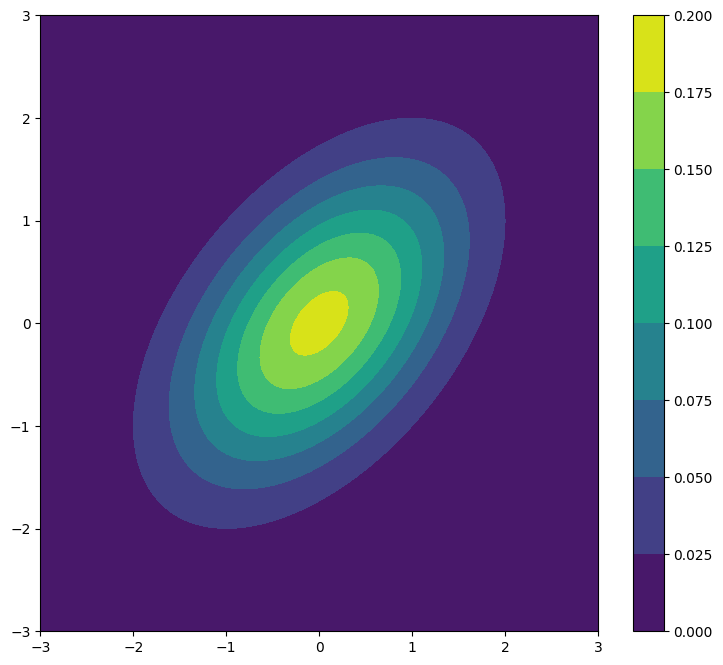

In [18]:
norm_dist = stats.multivariate_normal(mean=Mean, cov=Covariancs_Matrix, seed=1000)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i, j] = norm_dist.pdf([X[i, j], Y[i, j]])

plt.figure(figsize=(9, 8))
# plt.contourf(X, Y, pdf,
#     # cmap="Greys"
# )
contour = plt.contourf(
    X,
    Y,
    pdf,
    #    cmap="Greys"
)
plt.colorbar(contour)
# plt.title("Contour Plot of Bivariate Normal Distribution")

## Using Gibbs Sampling method


In [19]:
def Gibbs_Sample(inetial_sample, sample_size=SAMPLE_SIZE):
    sample = inetial_sample.copy()
    for _ in range(sample_size):
        old_y = sample[1][-1]
        new_x = np.random.normal(RHO * old_y, (1 - RHO**2))
        new_y = np.random.normal(RHO * new_x, (1 - RHO**2))
        sample[0].append(new_x)
        sample[1].append(new_y)
    return np.array(sample)

### First Sample

inetial state $(-1,-1)$


In [21]:
init_sample1 = [[-1], [-1]]
sample1 = Gibbs_Sample(init_sample1)
df = pd.DataFrame(np.transpose(sample1))
df.to_csv("sample1.csv")

Text(0, 0.5, '$X_2$')

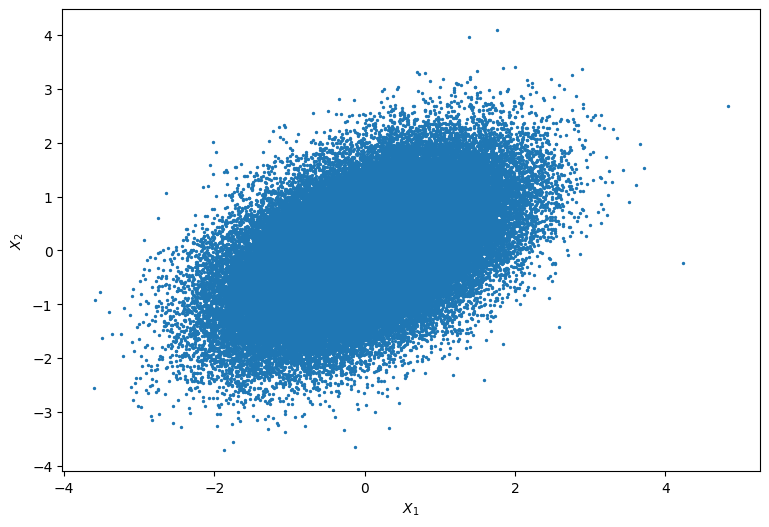

In [22]:
plt.figure(figsize=(9, 6))
# sns.scatterplot(x=sample1[0], y=sample1[1], s=5, color="blue")
plt.scatter(x=sample1[0], y=sample1[1], s=2)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

### secound sample

inetial state (-4,-4)


In [23]:
init_sample2 = [[-4], [-4]]
sample2 = Gibbs_Sample(init_sample2)
df = pd.DataFrame(np.transpose(sample2))
df.to_csv("sample2.csv")

Text(0, 0.5, '$X_2$')

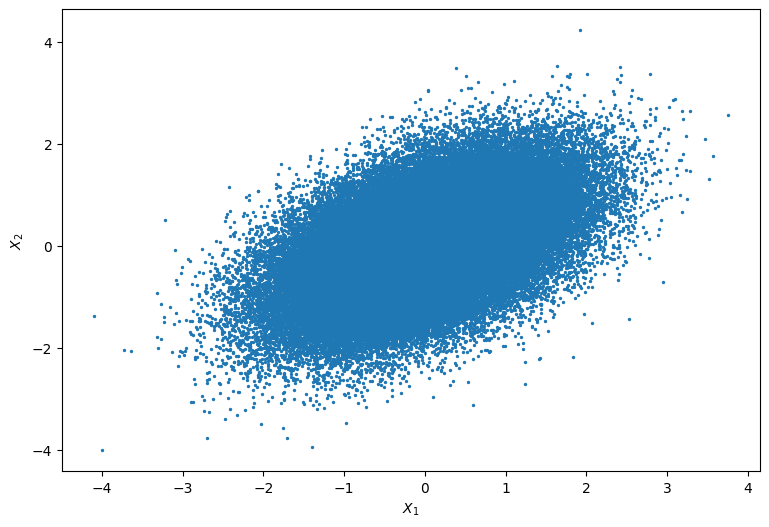

In [24]:
plt.figure(figsize=(9, 6))
plt.scatter(x=sample2[0], y=sample2[1], s=2)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

### third sample

initial sample = (0,0)


In [25]:
init_sample3 = [[0], [0]]
sample3 = Gibbs_Sample(init_sample3)
df = pd.DataFrame(np.transpose(sample3))
df.to_csv("sample3.csv")

Text(0, 0.5, '$X_2$')

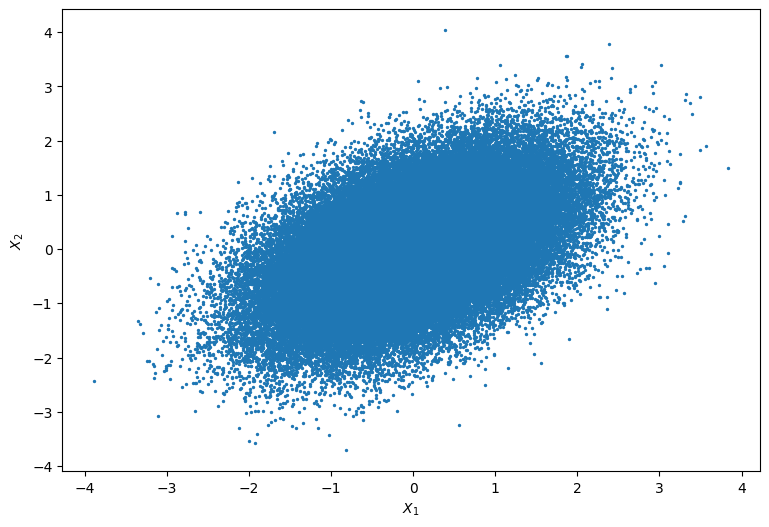

In [26]:
plt.figure(figsize=(9, 6))
plt.scatter(x=sample3[0], y=sample3[1], s=2)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

## comparing samples


Text(0.5, 0, '$X_1$')

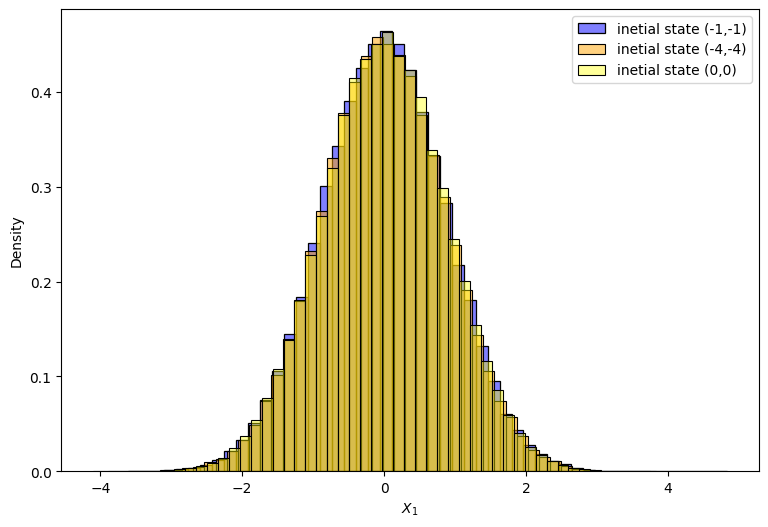

In [27]:
plt.figure(figsize=(9, 6))
sns.histplot(
    sample1[0],
    color="blue",
    alpha=0.5,
    bins=50,
    stat="density",
    label="inetial state (-1,-1)",
)
sns.histplot(
    sample2[0],
    color="orange",
    alpha=0.5,
    bins=50,
    stat="density",
    label="inetial state (-4,-4)",
)
sns.histplot(
    sample3[0],
    color="yellow",
    alpha=0.4,
    bins=50,
    stat="density",
    label="inetial state (0,0)",
)
plt.legend()
plt.xlabel(r"$X_1$")

Text(0.5, 0, '$X_2$')

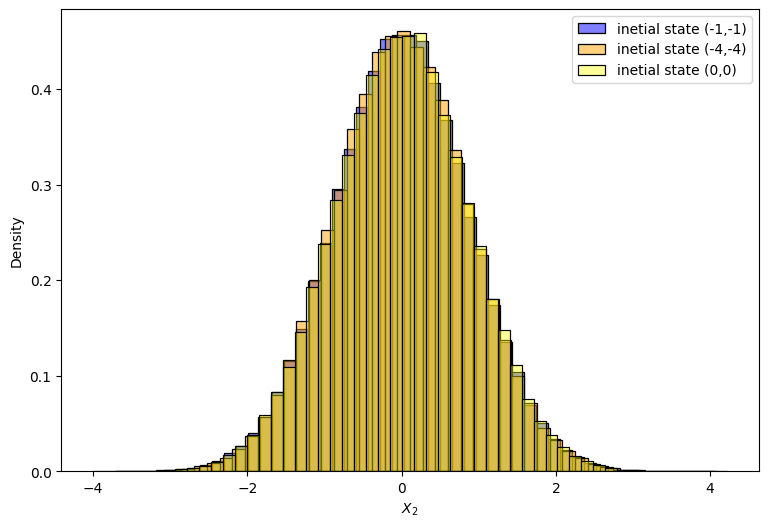

In [28]:
plt.figure(figsize=(9, 6))
sns.histplot(
    sample1[1],
    color="blue",
    alpha=0.5,
    bins=50,
    stat="density",
    label="inetial state (-1,-1)",
)
sns.histplot(
    sample2[1],
    color="orange",
    alpha=0.5,
    bins=50,
    stat="density",
    label="inetial state (-4,-4)",
)
sns.histplot(
    sample3[1],
    color="yellow",
    alpha=0.4,
    bins=50,
    stat="density",
    label="inetial state (0,0)",
)
plt.legend()
plt.xlabel(r"$X_2$")

Text(0.5, 0, '$X_2$')

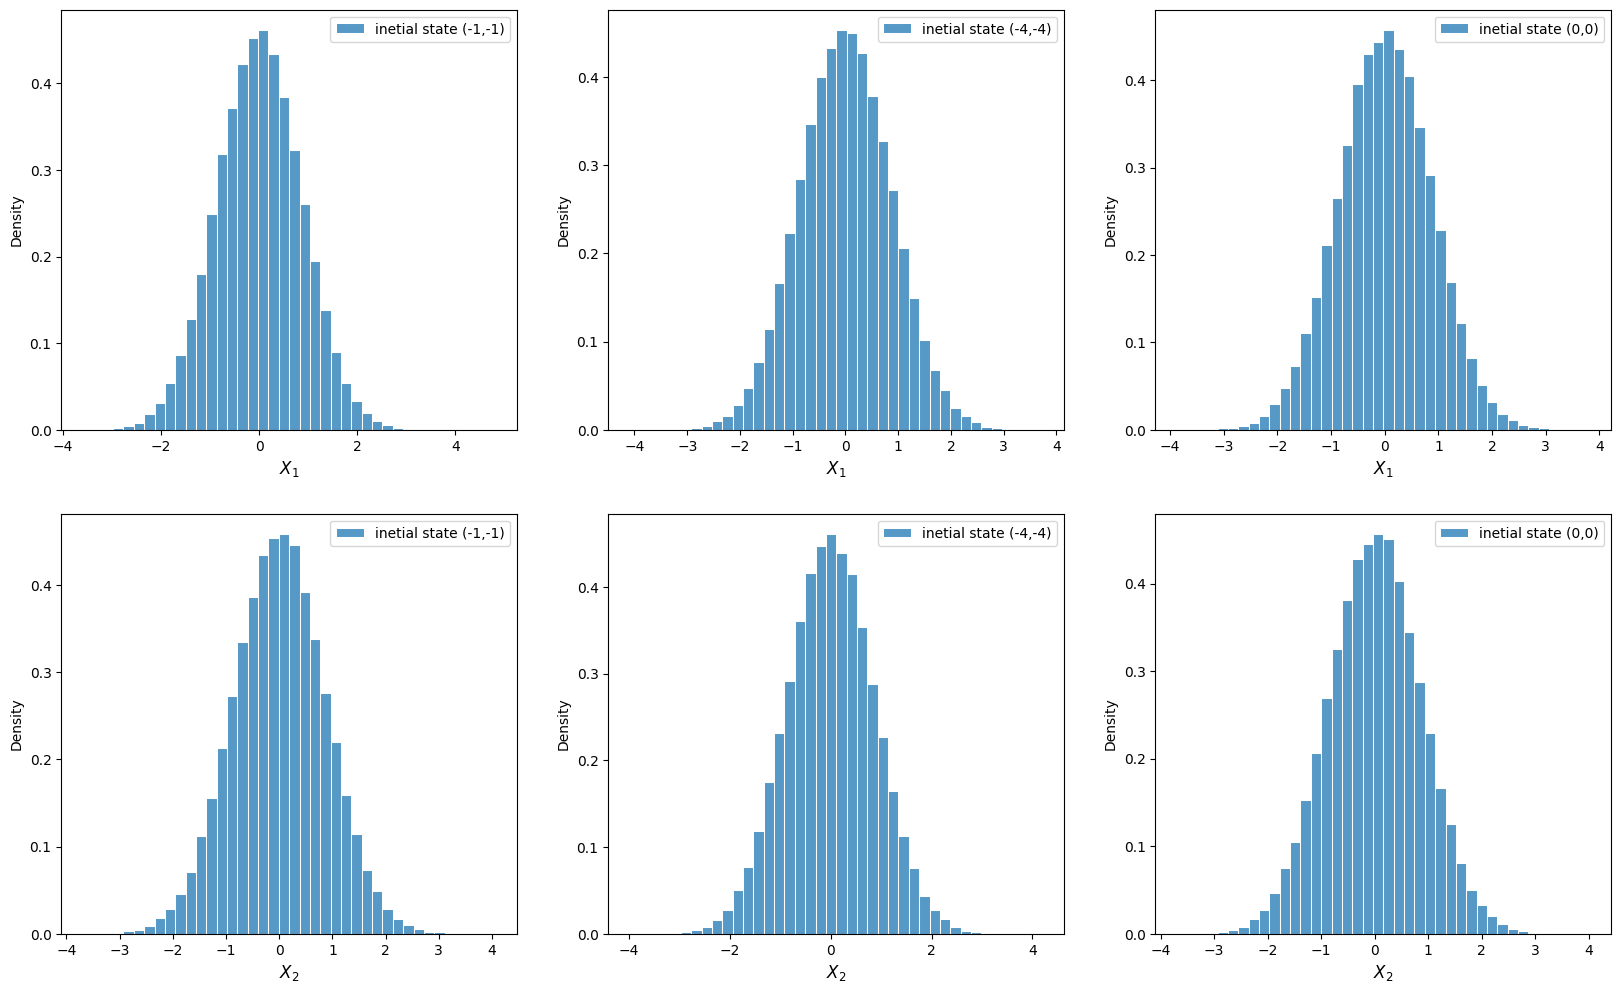

In [29]:
plt.figure(figsize=(20, 12))

# plot 1
plt.subplot(2, 3, 1)
sns.histplot(
    sample1[0],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (-1,-1)",
)
plt.legend()
plt.xlabel(r"$X_1$", fontsize=12)

# plot 2
plt.subplot(2, 3, 2)
sns.histplot(
    sample2[0],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (-4,-4)",
)
plt.legend()
plt.xlabel(r"$X_1$", fontsize=12)

# plot 3
plt.subplot(2, 3, 3)
sns.histplot(
    sample3[0],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (0,0)",
)
plt.legend()
plt.xlabel(r"$X_1$", fontsize=12)

# plot 4
plt.subplot(2, 3, 4)
sns.histplot(
    sample1[1],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (-1,-1)",
)
plt.legend()
plt.xlabel(r"$X_2$", fontsize=12)

# plot 5
plt.subplot(2, 3, 5)
sns.histplot(
    sample2[1],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (-4,-4)",
)
plt.legend()
plt.xlabel(r"$X_2$", fontsize=12)

# plot 6
plt.subplot(2, 3, 6)
sns.histplot(
    sample3[1],
    # color="k",
    edgecolor="w",
    bins=40,
    stat="density",
    label="inetial state (0,0)",
)
plt.legend()
plt.xlabel(r"$X_2$", fontsize=12)